In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

df1_pr= pd.read_csv("df1_pr.csv")
df2_pr= pd.read_csv("df2_pr.csv")
attrition_pr= pd.read_csv("attrition_pr.csv")

In [253]:
df1_pr.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [254]:
df1_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           4449 non-null   int64  
 1   Age                      4449 non-null   float64
 2   BusinessTravel           4449 non-null   object 
 3   DailyRate                4449 non-null   float64
 4   Department               4449 non-null   object 
 5   DistanceFromHome         4449 non-null   float64
 6   Education                4449 non-null   float64
 7   EducationField           4449 non-null   object 
 8   EmployeeCount            4449 non-null   float64
 9   EnvironmentSatisfaction  4449 non-null   float64
 10  Gender                   4449 non-null   object 
 11  HourlyRate               4449 non-null   float64
 12  JobInvolvement           4449 non-null   float64
 13  JobLevel                 4449 non-null   float64
 14  JobRole                 

In [255]:
df1_pr.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [256]:
df2_pr.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [257]:
df2_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

In [258]:
df2_pr.describe()

,EmployeeNumber,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [259]:
attrition_pr.head()

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No


In [260]:
attrition_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmployeeNumber  4449 non-null   int64 
 1   Attrition       4302 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.6+ KB


In [261]:
dane = pd.merge(df1_pr, df2_pr, on='EmployeeNumber', how='inner')
dane

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [262]:
dane_copy=dane

In [263]:
dane_copy = dane_copy.drop(['Over18','EmployeeCount', 'StandardHours'], axis=1)

array([[<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>],
       [<Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>],
       [<Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>],
       [<Axes: title={'center': 'TrainingTimesLastYear'}

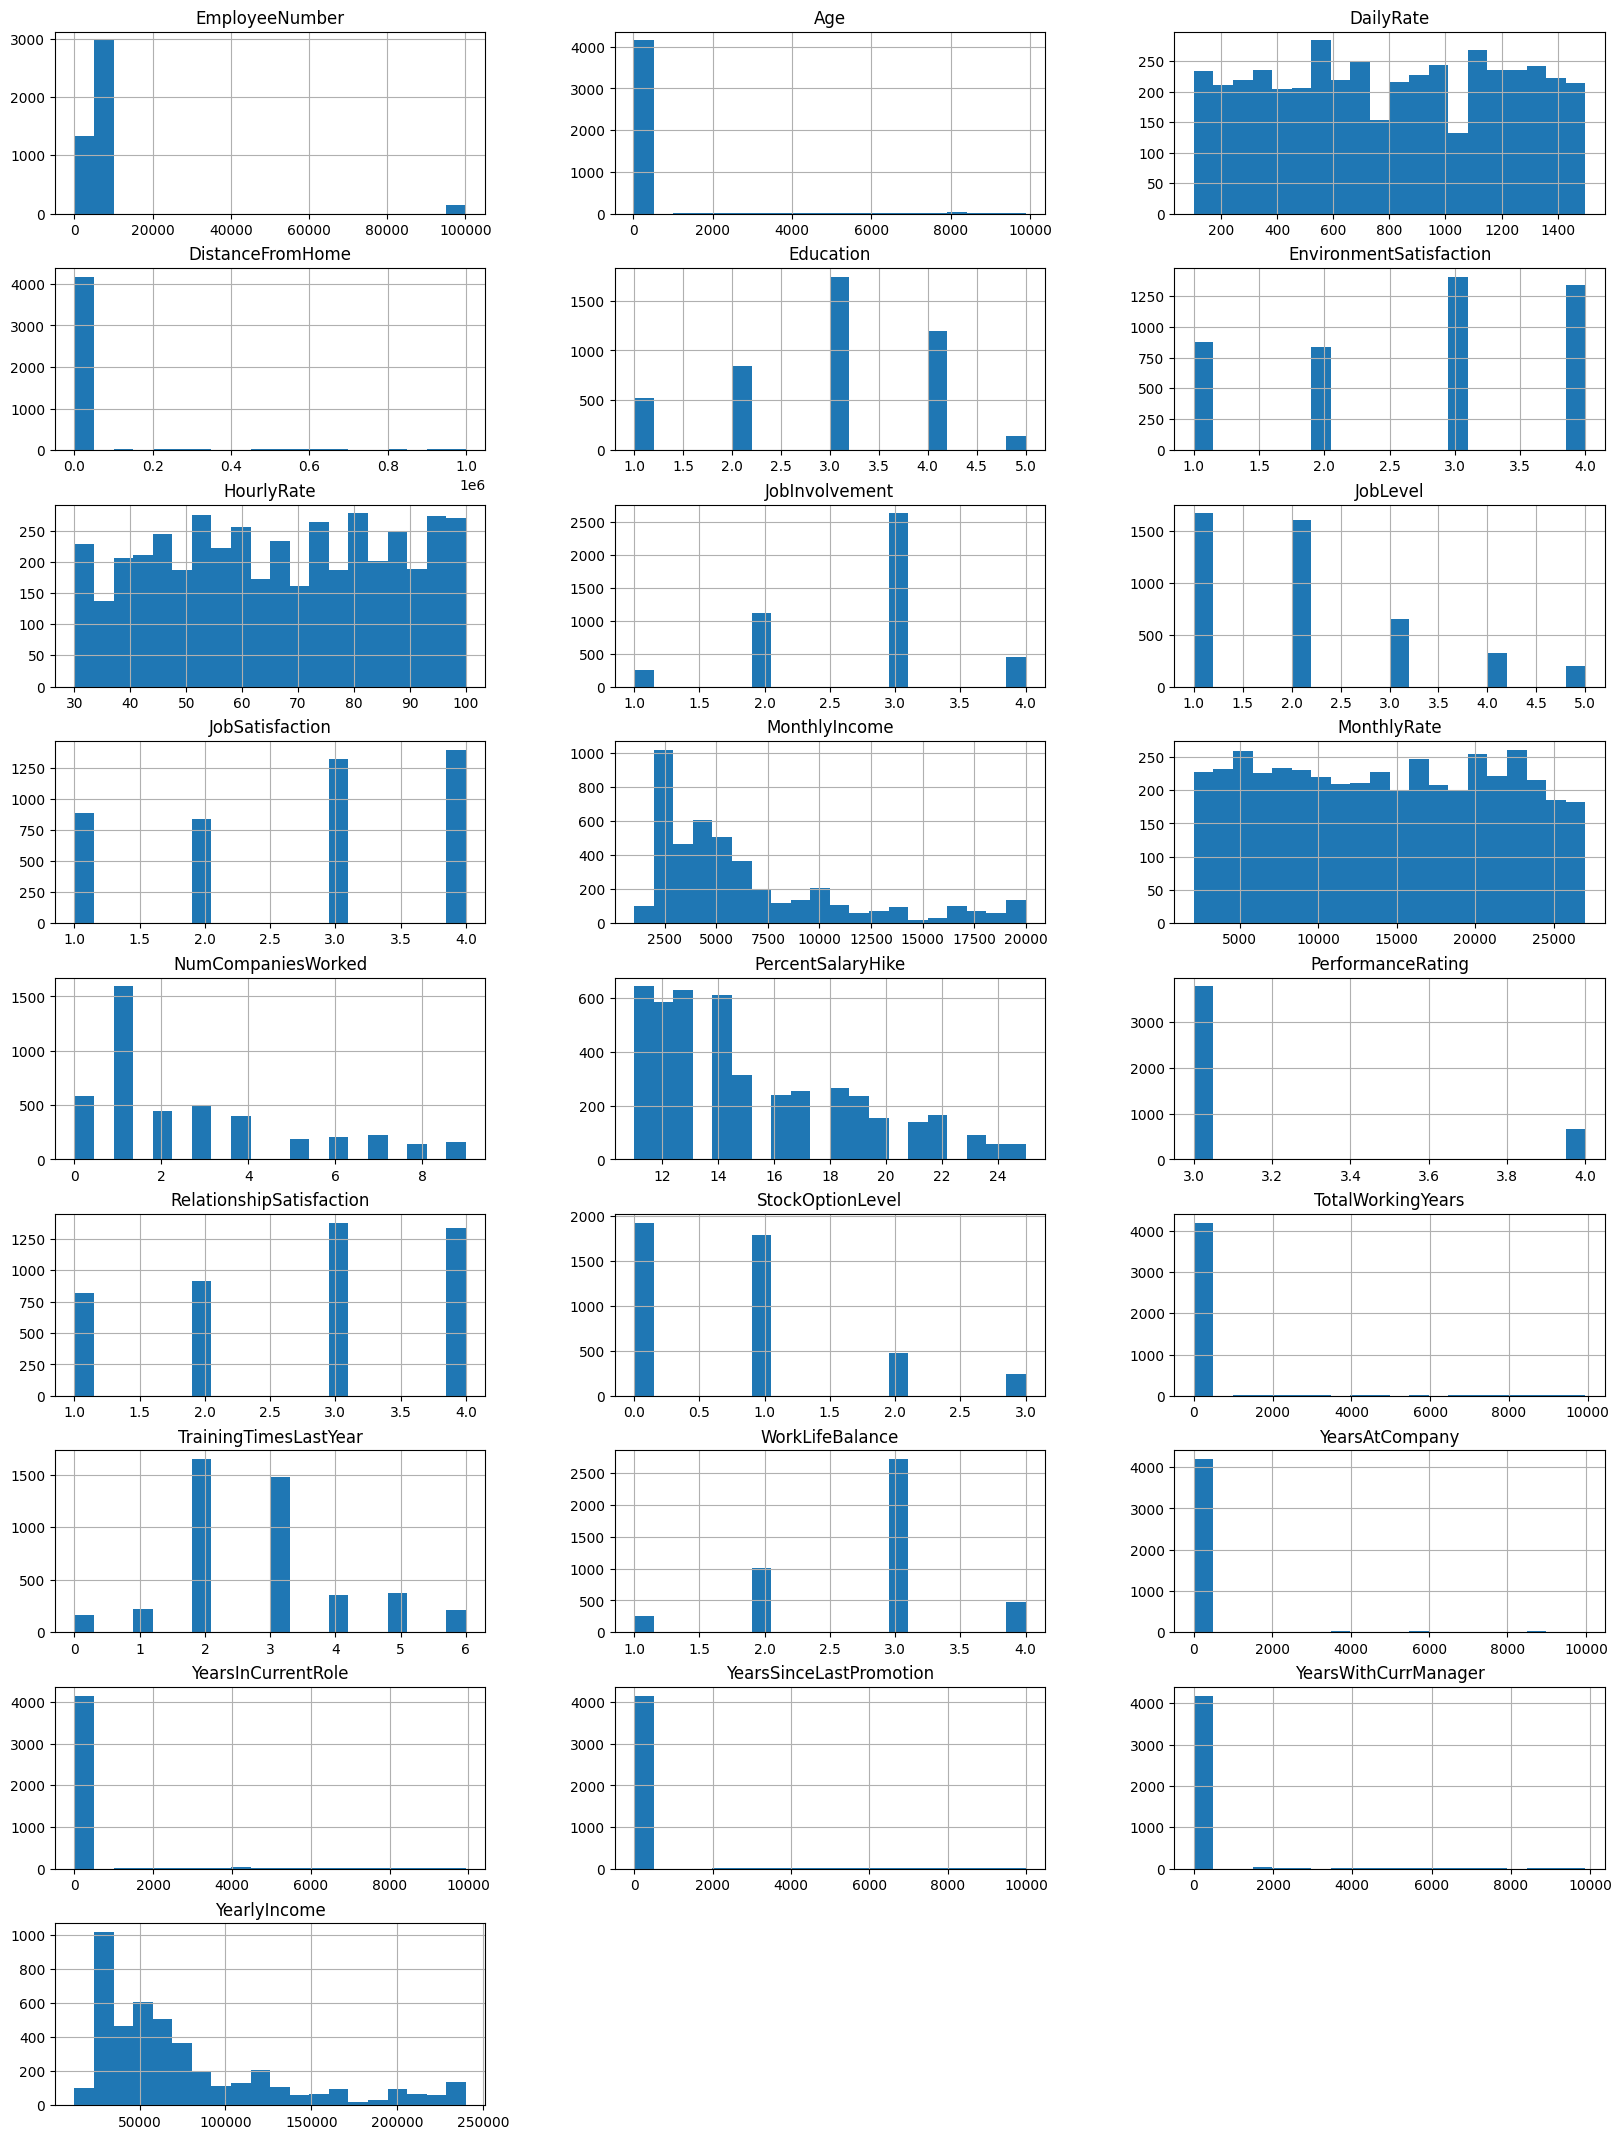

In [264]:
dane_copy.hist(bins=20,layout=(10,3),figsize=(20,30))

In [265]:
dane_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,4449.0,7956.865588,17226.922333,1.0,1735.0,5902.0,7014.0,100146.0
Age,4449.0,416.187458,1566.205147,18.0,31.0,36.0,45.0,9890.0
DailyRate,4449.0,801.017982,405.605362,102.0,458.0,804.0,1162.0,1499.0
DistanceFromHome,4449.0,33339.433356,145352.131423,1.0,2.0,8.0,17.0,999590.0
Education,4449.0,2.909867,1.025184,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,4449.0,2.719263,1.093263,1.0,2.0,3.0,4.0,4.0
HourlyRate,4449.0,65.977073,20.277369,30.0,48.0,66.0,84.0,100.0
JobInvolvement,4449.0,2.739492,0.712660,1.0,2.0,3.0,3.0,4.0
JobLevel,4449.0,2.053495,1.102979,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,4449.0,2.724882,1.107453,1.0,2.0,3.0,4.0,4.0


In [266]:
dane_copy["Attrition"].isna().sum()

np.int64(147)

In [267]:
dane_copy = dane_copy.dropna(subset=["Attrition"])

In [268]:
np.sort(dane_copy['Age'].unique())

array([  18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60., 1107., 1126.,
       1136., 1141., 1189., 1423., 1530., 1541., 1578., 1775., 1788.,
       1915., 2012., 2095., 2186., 2242., 2275., 2280., 2404., 2423.,
       2459., 2530., 2637., 2641., 2667., 2698., 2852., 2882., 2888.,
       2972., 2982., 2993., 3095., 3147., 3226., 3281., 3388., 3437.,
       3469., 3626., 3628., 3636., 3871., 4130., 4137., 4322., 4328.,
       4330., 4454., 4510., 4515., 4553., 4558., 4591., 4744., 4805.,
       4834., 4880., 4935., 4973., 4985., 4988., 5007., 5034., 5116.,
       5215., 5257., 5377., 5402., 5565., 5582., 5614., 5672., 5852.,
       5933., 5959., 5997., 6025., 6032., 6210., 6287., 6399., 6429.,
       6506., 6510.,

In [269]:
dane_copy = dane_copy[dane_copy['Age']<=60]

In [270]:
unique_distances = sorted(dane_copy['DistanceFromHome'].unique())
print(unique_distances)

[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(102583.0), np.float64(102637.0), np.float64(119377.0), np.float64(123628.0), np.float64(135607.0), np.float64(138023.0), np.float64(140916.0), np.float64(143454.0), np.float64(147920.0), np.float64(150886.0), np.float64(161435.0), np.float64(167566.0), np.float64(187830.0), np.float64(193929.0), np.float64(204179.0), np.float64(215000.0), np.float64(220024.0), np.float64(229109.0), np.float64(237547.0), np.float64(242839.0), np.float64(249717.0), np.float64(249810.0), np

In [271]:
dane_copy = dane_copy[dane_copy['DistanceFromHome']<=30]

In [272]:
unique_years_manager = sorted(dane_copy['YearsWithCurrManager'].unique())
print(unique_years_manager)

[np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(1067.0), np.float64(1077.0), np.float64(1142.0), np.float64(1540.0), np.float64(1643.0), np.float64(1691.0), np.float64(1759.0), np.float64(1781.0), np.float64(1798.0), np.float64(1845.0), np.float64(1898.0), np.float64(1910.0), np.float64(1913.0), np.float64(1914.0), np.float64(1929.0), np.float64(1947.0), np.float64(1948.0), np.float64(1982.0), np.float64(2101.0), np.float64(2106.0), np.float64(2181.0), np.float64(2220.0), np.float64(2333.0), np.float64(2411.0), np.float64(2428.0), np.float64(2460.0), np.float64(2480.0), np.float64(2564.0), np.float64(2702.0), np.float64(2728.0), np.float64(2736.0), np.float64(2811.0), np.float64(2879.0), np.float64(2883.0), np.fl

In [273]:
dane_copy = dane_copy[dane_copy['YearsWithCurrManager']<=20]

In [274]:
unique_total_years = sorted(dane_copy['TotalWorkingYears'].unique())
formatted_total_years = [f"{int(years):.0f}" for years in unique_total_years]
print(formatted_total_years)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '40', '1016', '1086', '1123', '1143', '1220', '1337', '1442', '1735', '1758', '1822', '1953', '2027', '2041', '2091', '2194', '2230', '2270', '2300', '2352', '2439', '2450', '2604', '2651', '2730', '2764', '2820', '2976', '3077', '3089', '3201', '3206', '3311', '3360', '3417', '3625', '3778', '3808', '3879', '4031', '4132', '4176', '4196', '4264', '4370', '4409', '4506', '4607', '4640', '4694', '4740', '4795', '4958', '4969', '5002', '5257', '5377', '5407', '5463', '5482', '5505', '5629', '5644', '5649', '5670', '5676', '5742', '5772', '5787', '5789', '6100', '6167', '6314', '6345', '6456', '6463', '6502', '6563', '6566', '6606', '6618', '6652', '6666', '6907', '6990', '7053', '7089', '7173', '7223', '7267', '7349', '7515', '7635', '7680', '7762', '7825', '7843', '

In [275]:
dane_copy = dane_copy[dane_copy["TotalWorkingYears"]<=40]

In [276]:
unique_years_company = sorted(dane_copy['YearsAtCompany'].unique())
formatted_years_company= [f"{years:.0f}" for years in unique_years_company]
print(formatted_years_company)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '29', '30', '31', '32', '33', '34', '36', '37', '40', '1036', '1184', '1239', '1282', '1286', '1295', '1344', '1375', '1378', '1420', '1488', '1564', '1621', '1625', '1646', '1761', '1872', '1977', '2041', '2051', '2072', '2203', '2265', '2332', '2506', '2516', '2551', '2659', '2744', '2785', '2809', '2925', '2987', '3074', '3079', '3126', '3132', '3177', '3190', '3202', '3231', '3335', '3507', '3549', '3584', '3645', '3649', '3655', '3687', '3707', '3734', '3743', '3761', '3812', '3912', '3927', '4014', '4198', '4369', '4604', '4706', '4763', '4783', '4879', '5066', '5078', '5096', '5132', '5150', '5209', '5276', '5359', '5368', '5506', '5512', '5581', '5706', '5736', '5765', '5801', '5888', '5904', '6040', '6103', '6133', '6140', '6144', '6225', '6253', '6524', '6705', '6797', '6834', '7217', '7324', '7335', '7337', '7338', '73

In [277]:
dane_copy = dane_copy[dane_copy["YearsAtCompany"]<=40]

In [278]:
unique_years_role = sorted(dane_copy['YearsInCurrentRole'].unique())
formatted_years_role= [f"{years:.0f}" for years in unique_years_role]
print(formatted_years_role)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '1009', '1099', '1179', '1190', '1191', '1335', '1404', '1584', '1602', '1615', '1732', '1797', '1810', '1838', '1858', '1924', '1995', '2100', '2112', '2360', '2470', '2514', '2515', '2582', '2596', '2647', '2816', '2822', '2825', '2848', '2868', '2931', '2939', '2975', '2979', '3015', '3033', '3099', '3121', '3235', '3364', '3443', '3453', '3509', '3591', '3606', '3683', '3723', '3726', '3797', '3802', '3814', '3978', '4137', '4139', '4174', '4194', '4212', '4218', '4230', '4252', '4323', '4362', '4376', '4435', '4461', '4551', '4558', '4623', '4656', '4713', '4858', '4925', '4986', '5181', '5203', '5274', '5335', '5438', '5637', '5735', '5834', '5841', '6001', '6048', '6081', '6131', '6169', '6180', '6188', '6246', '6364', '6378', '6387', '6415', '6421', '6430', '6651', '6691', '6755', '6784', '6862', '6908', '7077', '7105', '7125', '7137', '7320', '7392', '7395', '7420', '7484',

In [279]:
dane_copy = dane_copy[dane_copy["YearsInCurrentRole"]<=20]

In [280]:
unique_years_promotion = sorted(dane_copy['YearsSinceLastPromotion'].unique())
formatted_years_promotion= [f"{years:.0f}" for years in unique_years_promotion]
print(formatted_years_promotion)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '1058', '1094', '1201', '1639', '1815', '1973', '2025', '2079', '2081', '2153', '2166', '2282', '2293', '2475', '2576', '2723', '2743', '2745', '2754', '2778', '2789', '2922', '3057', '3082', '3089', '3246', '3486', '3720', '3742', '3771', '3777', '3832', '3884', '3982', '4071', '4094', '4098', '4200', '4204', '4370', '4382', '4409', '4434', '4468', '4547', '4575', '4586', '4619', '4704', '4763', '4885', '4940', '4958', '5151', '5165', '5266', '5284', '5291', '5292', '5308', '5346', '5383', '5391', '5392', '5431', '5649', '5738', '5881', '5894', '5957', '5994', '6003', '6196', '6233', '6279', '6305', '6350', '6401', '6440', '6551', '6747', '6763', '6767', '6773', '6847', '6881', '6920', '6968', '7056', '7137', '7240', '7291', '7322', '7403', '7427', '7521', '7609', '7659', '7816', '7859', '7868', '7897', '7989', '7997', '8021', '8053', '8080', '8113', '8213', '8312', '8366', '8467', '8515', '8534', '

In [281]:
dane_copy = dane_copy[dane_copy["YearsSinceLastPromotion"]<=15]

In [282]:
dane_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2351.0,3399.864313,2787.632321,1.0,909.5,1830.0,6226.5,7963.0
Age,2351.0,36.967248,9.108810,18.0,30.0,36.0,43.0,60.0
DailyRate,2351.0,799.252233,400.960014,102.0,461.5,802.0,1153.5,1498.0
DistanceFromHome,2351.0,9.253509,8.137460,1.0,2.0,7.0,14.0,29.0
Education,2351.0,2.915355,1.026491,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,2351.0,2.713313,1.083488,1.0,2.0,3.0,4.0,4.0
HourlyRate,2351.0,66.503615,20.121564,30.0,49.0,67.0,84.0,100.0
JobInvolvement,2351.0,2.751595,0.701042,1.0,2.0,3.0,3.0,4.0
JobLevel,2351.0,2.073586,1.106320,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,2351.0,2.720119,1.092691,1.0,2.0,3.0,4.0,4.0


In [283]:
duplicates = dane_copy[dane_copy.duplicated(subset=[col for col in dane_copy.columns if col != 'EmployeeNumber' and col != 'Attrition'])]
duplicates

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1476,5007,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
1477,5008,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,Yes,39720.0
1484,5015,42.0,Travel_Rarely,269.0,Research & Development,2.0,3.0,Medical,4.0,Female,...,1.0,10.0,4.0,3.0,9.0,6.0,7.0,8.0,No,31116.0
1498,5029,32.0,Travel_Rarely,977.0,Research & Development,2.0,3.0,Medical,4.0,Male,...,2.0,10.0,4.0,2.0,9.0,5.0,1.0,6.0,Yes,65640.0
1503,5034,28.0,Travel_Rarely,995.0,Research & Development,9.0,3.0,Medical,3.0,Female,...,1.0,6.0,2.0,3.0,2.0,2.0,2.0,2.0,Yes,28524.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,7954,35.0,Travel_Rarely,538.0,Research & Development,25.0,2.0,Other,1.0,Male,...,0.0,9.0,3.0,3.0,3.0,2.0,0.0,2.0,Yes,44172.0
4424,7955,35.0,Travel_Rarely,538.0,Research & Development,25.0,2.0,Other,1.0,Male,...,0.0,9.0,3.0,3.0,3.0,2.0,0.0,2.0,Yes,44172.0
4426,7957,29.0,Travel_Rarely,1210.0,Sales,2.0,3.0,Medical,1.0,Male,...,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,Yes,79728.0
4427,7958,29.0,Travel_Rarely,1210.0,Sales,2.0,3.0,Medical,1.0,Male,...,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,Yes,79728.0


In [284]:
dane_copy = dane_copy.drop_duplicates(subset=[col for col in dane_copy.columns if col != 'EmployeeNumber' and col != 'Attrition'], keep="first")

In [285]:
is_equal = (dane_copy['MonthlyIncome'] == (dane_copy['YearlyIncome'] / 12)).all()
is_equal

np.True_

In [286]:
dane_copy = dane_copy.drop(columns=['YearlyIncome'])

In [287]:
dane_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,1373.0,1273.119446,1408.037580,1.0,514.0,1048.0,1612.0,7962.0
Age,1373.0,36.856519,9.140415,18.0,30.0,36.0,43.0,60.0
DailyRate,1373.0,802.794610,402.631412,102.0,465.0,802.0,1157.0,1498.0
DistanceFromHome,1373.0,9.119446,8.068783,1.0,2.0,7.0,14.0,29.0
Education,1373.0,2.902403,1.024810,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1373.0,2.722505,1.093739,1.0,2.0,3.0,4.0,4.0
HourlyRate,1373.0,66.000000,20.306579,30.0,48.0,66.0,84.0,100.0
JobInvolvement,1373.0,2.727604,0.712305,1.0,2.0,3.0,3.0,4.0
JobLevel,1373.0,2.059723,1.102972,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1373.0,2.723234,1.097582,1.0,2.0,3.0,4.0,4.0


array([[<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>],
       [<Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>],
       [<Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>],
       [<Axes: title={'center': 'TrainingTimesLastYear'}

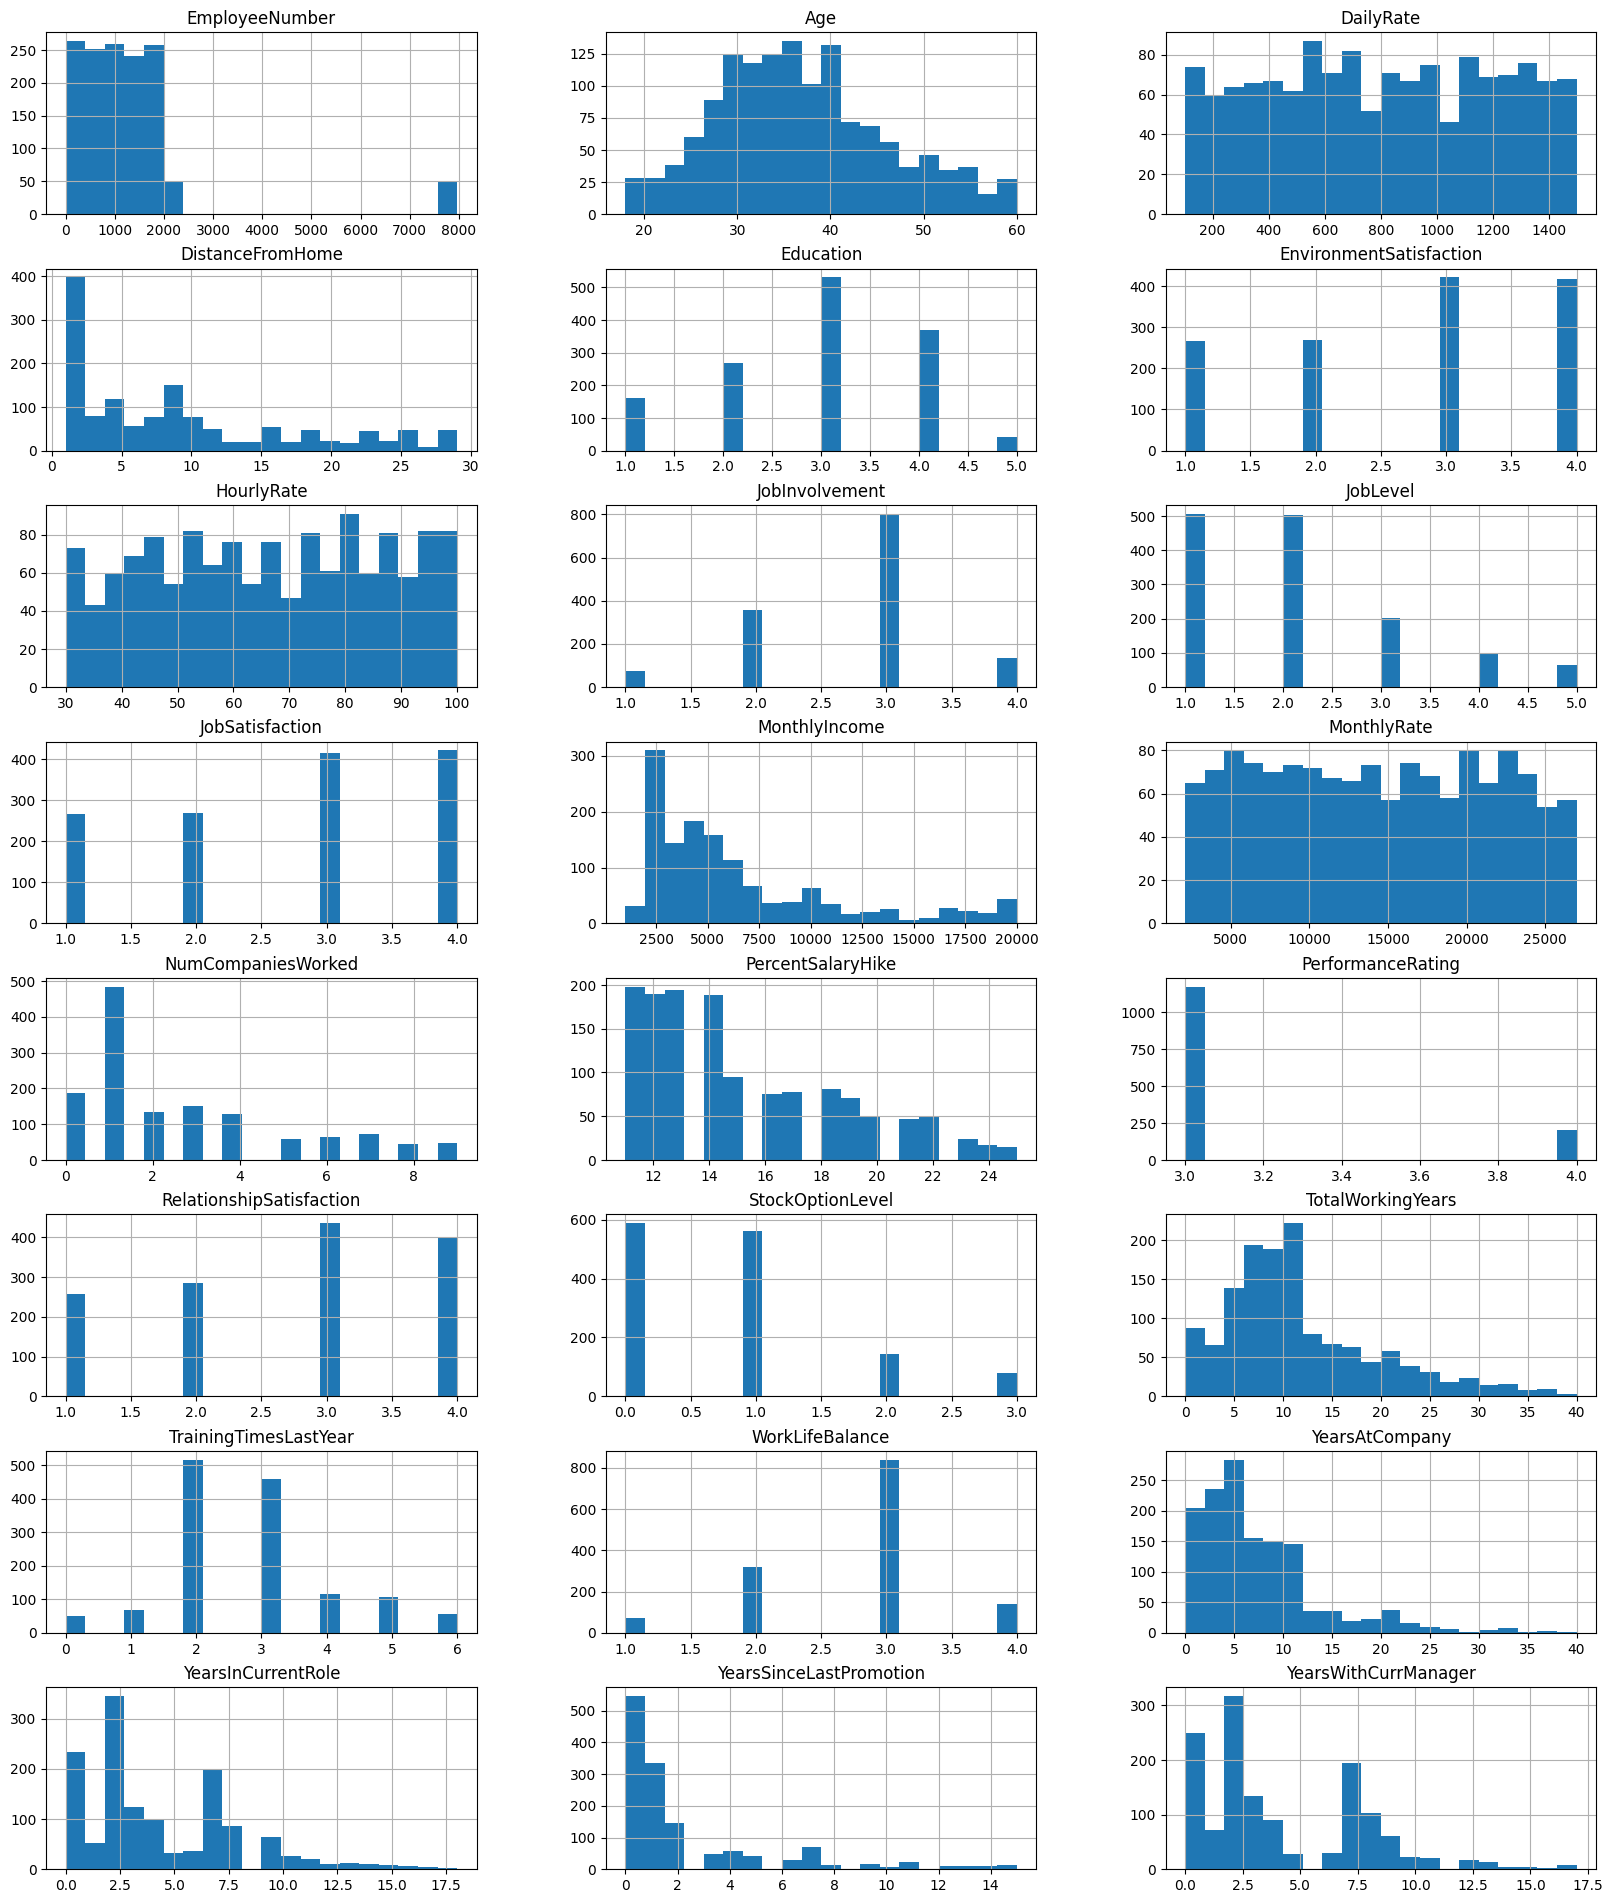

In [288]:
dane_copy.hist(bins=20,layout=(10,3),figsize=(20,30))

In [289]:
dane_copy = pd.get_dummies(dane_copy,columns=['BusinessTravel','EducationField','JobRole','MaritalStatus'],dtype=int)

In [290]:
dane_copy['AgeGroup'] = dane_copy['Age'].apply(lambda x: x//10)

In [291]:
dane_copy['Gender'] = dane_copy['Gender'].map({'Male': 1, 'Female':0})

In [292]:
dane_copy['OverTime'] = dane_copy['OverTime'].map({'Yes': 1, 'No':0})

In [293]:
dane_copy['Attrition'] = dane_copy['Attrition'].map({'Yes': 1, 'No':0})

In [294]:
dane_copy = dane_copy.drop('Department', axis=1)

In [295]:
dane_copy.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,AgeGroup
count,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,...,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000
mean,1273.119446,36.856519,802.794610,9.119446,2.902403,2.722505,0.603787,66.000000,2.727604,2.059723,...,0.067007,0.101966,0.053897,0.200291,0.220685,0.057538,0.224326,0.458121,0.317553,3.235980
std,1408.037580,9.140415,402.631412,8.068783,1.024810,1.093739,0.489288,20.306579,0.712305,1.102972,...,0.250124,0.302715,0.225896,0.400364,0.414859,0.232953,0.417290,0.498425,0.465694,0.962694
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,514.000000,30.000000,465.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1048.000000,36.000000,802.000000,7.000000,3.000000,3.000000,1.000000,66.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1612.000000,43.000000,1157.000000,14.000000,4.000000,4.000000,1.000000,84.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
max,7962.000000,60.000000,1498.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [296]:
dane_copy.drop(columns=['EmployeeNumber'], inplace=True)

In [297]:
correlation_matrix = dane_copy.corr().abs()

correlation = correlation_matrix.stack().reset_index()
correlation.columns = ['Variable1', 'Variable2', 'Correlation']

correlation = correlation[correlation['Variable1'] != correlation['Variable2']]
correlation = correlation[correlation['Variable1'] != 'Attrition']
correlation = correlation[correlation['Variable2'] != 'Attrition']

correlation = correlation.sort_values(by='Correlation', ascending=False)
correlation.head(30)

,Variable1,Variable2,Correlation
2256,AgeGroup,Age,0.953339
47,Age,AgeGroup,0.953339
488,MonthlyIncome,JobLevel,0.949731
394,JobLevel,MonthlyIncome,0.949731
872,TotalWorkingYears,JobLevel,0.781202
402,JobLevel,TotalWorkingYears,0.781202
498,MonthlyIncome,TotalWorkingYears,0.772024
874,TotalWorkingYears,MonthlyIncome,0.772024
734,PerformanceRating,PercentSalaryHike,0.765917
687,PercentSalaryHike,PerformanceRating,0.765917


In [298]:
dane_copy = dane_copy.drop(columns=['Age','MonthlyIncome','TotalWorkingYears','PercentSalaryHike','YearsInCurrentRole','YearsWithCurrManager'])

In [299]:
from collections import Counter
X,y = dane_copy.drop(['Attrition'],axis=1), dane_copy['Attrition']
y = y.astype(int)
Counter(y)

Counter({0: 1132, 1: 241})

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.15,random_state=42)

Counter({0: 1132, 1: 241})

In [302]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

In [303]:
X_train_scaled = s_scaler.fit_transform(X_train)
X_test_scaled = s_scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
models = {
    "SVC": (
        SVC(),
        {
            'C': [0.1, 1, 4, 10],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    ),
    "KNeighborsClassifier": (
        KNeighborsClassifier(),
        {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    ),
    "RandomForestClassifier": (
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10, 11],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    ),
    "LogisticRegression": (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear'],
            'penalty': ['l2']
        }
    ),
    "GaussianNB": (
        GaussianNB(),
        {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    ),
    "GradientBoostingClassifier": (
        GradientBoostingClassifier(),
        {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.15, 0.2],
            'max_depth': [3, 5, 7]
        }
    ),
    "XGBClassifier": (
        XGBClassifier(eval_metric='logloss'),
        {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    ),
    "LGBMClassifier": (
        LGBMClassifier(),
        {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'num_leaves': [31, 63]
        }
    ),
}

results = {}


for name, (model, params) in models.items():
    print(f"\nRunning Grid Search for: {name}")
    grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    results[name] = {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_
    }
    print(f" Best score for {name}: {grid.best_score_:.4f}")
    print(f" Best parameters: {grid.best_params_}")

sorted_results = sorted(results.items(), key=lambda x: x[1]['best_score'], reverse=True)


Running Grid Search for: SVC
 Best score for SVC: 0.8785
 Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Running Grid Search for: KNeighborsClassifier
 Best score for KNeighborsClassifier: 0.9165
 Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Running Grid Search for: RandomForestClassifier
 Best score for RandomForestClassifier: 0.8928
 Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Running Grid Search for: LogisticRegression
 Best score for LogisticRegression: 0.8706
 Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

Running Grid Search for: GaussianNB
 Best score for GaussianNB: 0.7343
 Best parameters: {'var_smoothing': 1e-09}

Running Grid Search for: GradientBoostingClassifier
 Best score for GradientBoostingClassifier: 0.8801
 Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}

Running Grid Search for: XGBClassifier
 Best score fo

In [ ]:
for name, res in sorted_results:
    print(f"{name}: {res['best_score']:.4f} — {res['best_params']}")

KNeighborsClassifier: 0.9165 — {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
RandomForestClassifier: 0.8912 — {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
SVC: 0.8785 — {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
GradientBoostingClassifier: 0.8769 — {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
XGBClassifier: 0.8764 — {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
LGBMClassifier: 0.8764 — {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}
LogisticRegression: 0.8706 — {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
GaussianNB: 0.7343 — {'var_smoothing': 1e-09}


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, accuracy_score

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report


results_table = pd.DataFrame(columns=['Model', 'CV Score', 'F1 Score'])

def check_model(classifier, model_name, X_train, y_train, X_test, y_test):
    global results_table
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_score = cross_val_score(classifier, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1).mean()
    f1 = f1_score(y_test, predictions)
    results_table = pd.concat(
        [results_table, pd.DataFrame({'Model': [model_name], 'CV Score': [round(cv_score,2)], 'F1 Score': [round(f1,2)]})],
        ignore_index=True
    )
    print(f'{model_name} Cross Validation Score:', cv_score)
    print(f'{model_name} F1 Score:', f1)

def model_eval(classifier, X_test, y_test, Model):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.title(f'Confusion Matrix for {Model}')
    plt.show()
    print(classification_report(y_test, classifier.predict(X_test)))

SVC Cross Validation Score: 0.8884911243861074
SVC F1 Score: 0.2


C:\Users\akepo\AppData\Local\Temp\ipykernel_18096\1834414294.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat(


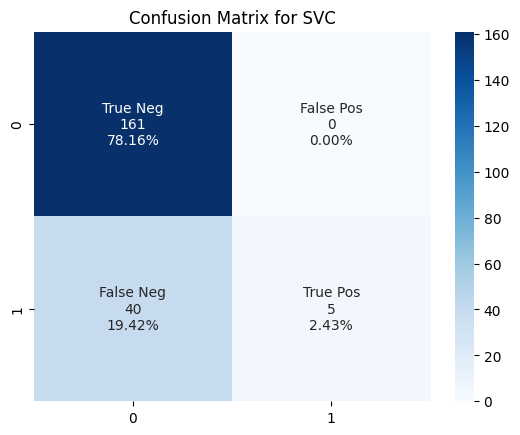

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       161
           1       1.00      0.11      0.20        45

    accuracy                           0.81       206
   macro avg       0.90      0.56      0.54       206
weighted avg       0.84      0.81      0.74       206



In [ ]:
Model = "SVC"
model=SVC(kernel='rbf',C=1,gamma= 'scale')

check_model(model, Model, X_train_scaled, y_train, X_test_scaled, y_test)
model_eval(model, X_test_scaled, y_test, Model)

KNeighborsClassifier Cross Validation Score: 0.9237664201835657
KNeighborsClassifier F1 Score: 0.3582089552238806


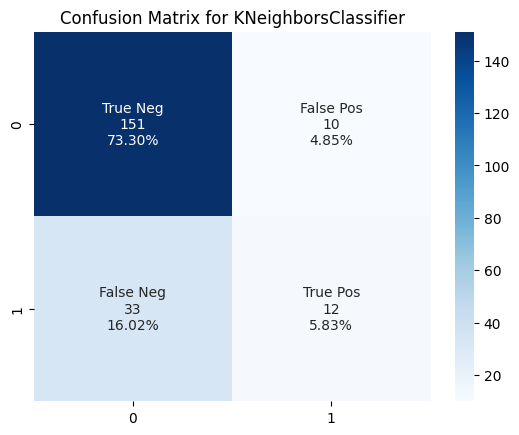

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       161
           1       0.55      0.27      0.36        45

    accuracy                           0.79       206
   macro avg       0.68      0.60      0.62       206
weighted avg       0.76      0.79      0.76       206



In [ ]:
Model = "KNeighborsClassifier"
model=KNeighborsClassifier(metric="manhattan", n_neighbors=5, weights='distance')

check_model(model, Model, X_train_scaled, y_train, X_test_scaled, y_test)
model_eval(model, X_test_scaled, y_test, Model)

RandomForestClassifier Cross Validation Score: 0.8955162302335604
RandomForestClassifier F1 Score: 0.3103448275862069


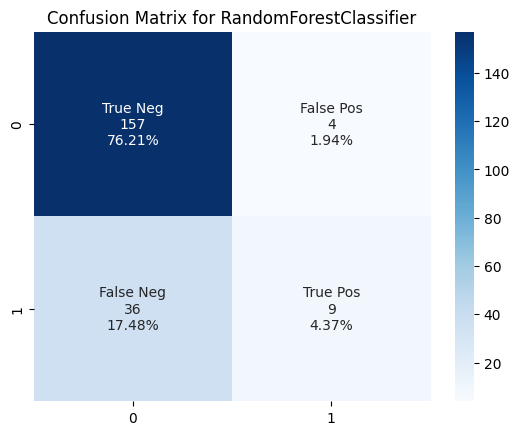

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       161
           1       0.69      0.20      0.31        45

    accuracy                           0.81       206
   macro avg       0.75      0.59      0.60       206
weighted avg       0.79      0.81      0.76       206



In [ ]:
Model = "RandomForestClassifier"
model=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

check_model(model, Model, X_train_scaled, y_train, X_test_scaled, y_test)
model_eval(model, X_test_scaled, y_test, Model)

LogisticRegression Cross Validation Score: 0.9029952578313201
LogisticRegression F1 Score: 0.5277777777777778


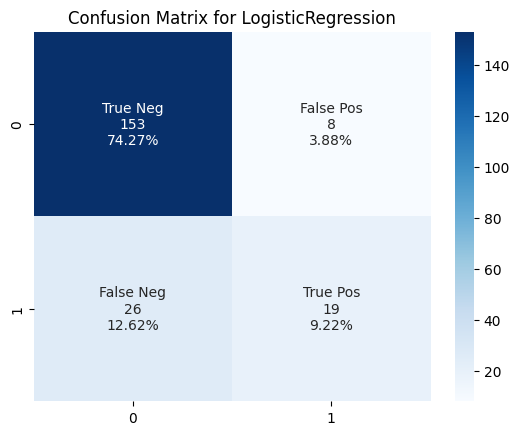

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       161
           1       0.70      0.42      0.53        45

    accuracy                           0.83       206
   macro avg       0.78      0.69      0.71       206
weighted avg       0.82      0.83      0.82       206



In [ ]:
from sklearn.linear_model import LogisticRegression
Model = "LogisticRegression"
model=LogisticRegression(max_iter=1000000, C=10, penalty= 'l2', solver='lbfgs')

check_model(model, Model, X_train_scaled, y_train, X_test_scaled, y_test)
model_eval(model, X_test_scaled, y_test, Model)

GaussianNB Cross Validation Score: 0.7812322140979836
GaussianNB F1 Score: 0.45


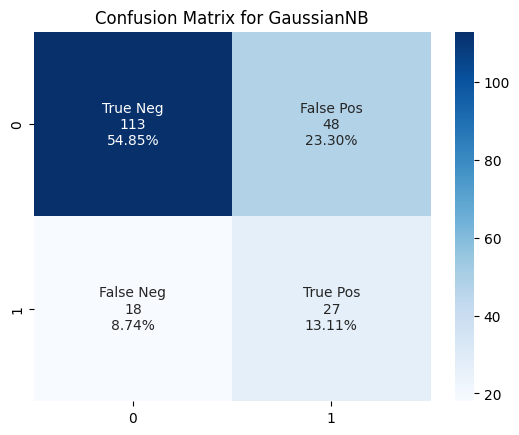

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       161
           1       0.36      0.60      0.45        45

    accuracy                           0.68       206
   macro avg       0.61      0.65      0.61       206
weighted avg       0.75      0.68      0.70       206



In [ ]:
from sklearn.naive_bayes import GaussianNB
Model = "GaussianNB"
model=GaussianNB(var_smoothing=1e-09)

check_model(model, Model, X_train_scaled, y_train, X_test_scaled, y_test)
model_eval(model, X_test_scaled, y_test, Model)

GradientBoostingClassifier Cross Validation Score: 0.9080181255012558
GradientBoostingClassifier F1 Score: 0.32786885245901637


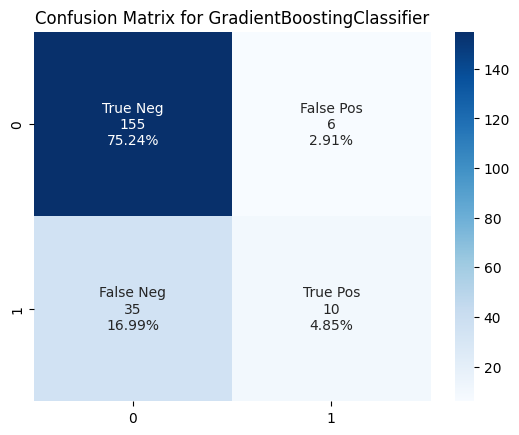

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       161
           1       0.62      0.22      0.33        45

    accuracy                           0.80       206
   macro avg       0.72      0.59      0.61       206
weighted avg       0.77      0.80      0.76       206



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier(n_estimators=200, learning_rate=0.15, max_depth=7)

check_model(model, Model, X_train_scaled, y_train, X_test_scaled, y_test)
model_eval(model, X_test_scaled, y_test, Model)

XGBClassifier Cross Validation Score: 0.9087079449632967
XGBClassifier F1 Score: 0.48484848484848486


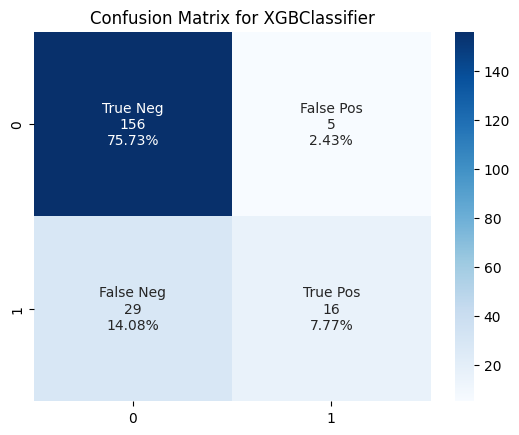

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       161
           1       0.76      0.36      0.48        45

    accuracy                           0.83       206
   macro avg       0.80      0.66      0.69       206
weighted avg       0.83      0.83      0.81       206



In [ ]:
import xgboost as xgb
Model = "XGBClassifier"
model=xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

check_model(model, Model, X_train_scaled, y_train, X_test_scaled, y_test)
model_eval(model, X_test_scaled, y_test, Model)

[LightGBM] [Info] Number of positive: 922, number of negative: 971
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4477
[LightGBM] [Info] Number of data points in the train set: 1893, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487058 -> initscore=-0.051781
[LightGBM] [Info] Start training from score -0.051781


c:\Users\akepo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier Cross Validation Score: 0.9114320412069563
LGBMClassifier F1 Score: 0.32786885245901637


c:\Users\akepo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


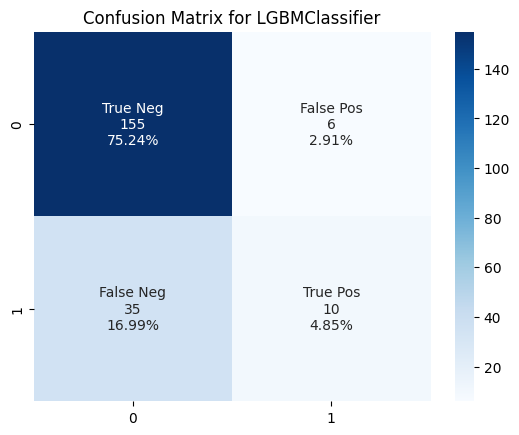

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       161
           1       0.62      0.22      0.33        45

    accuracy                           0.80       206
   macro avg       0.72      0.59      0.61       206
weighted avg       0.77      0.80      0.76       206



c:\Users\akepo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import lightgbm as lgb
Model = "LGBMClassifier"
model=lgb.LGBMClassifier(learning_rate= 0.1, n_estimators= 200, num_leaves= 31)

check_model(model, Model, X_train_scaled, y_train, X_test_scaled, y_test)
model_eval(model, X_test_scaled, y_test, Model)

In [ ]:
results_table.sort_values(['F1 Score'], inplace=True, ascending=False)
print(results_table)


                        Model  CV Score  F1 Score
3          LogisticRegression      0.90      0.53
6               XGBClassifier      0.91      0.48
4                  GaussianNB      0.78      0.45
1        KNeighborsClassifier      0.92      0.36
7              LGBMClassifier      0.91      0.33
5  GradientBoostingClassifier      0.91      0.33
2      RandomForestClassifier      0.90      0.31
0                         SVC      0.89      0.20
